In [59]:
!pip install hvplot

In [60]:
# Import dependencies
import numpy as np
import pandas as pd
import hvplot.pandas

In [61]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

Saving ETH-USD (3).csv to ETH-USD (3) (1).csv


In [62]:
# Read data
eth_df = pd.read_csv('ETH-USD (3).csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
eth_df = eth_df.drop(['Adj Close'], axis=1)
eth_df

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-25,91.089996,91.089996,91.089996,91.089996,0.0
2021-10-26,91.339996,91.339996,91.339996,91.339996,0.0
2021-10-27,88.010002,88.010002,88.010002,88.010002,0.0
2021-10-28,87.309998,87.309998,87.309998,87.309998,0.0
2021-10-29,86.570000,86.570000,86.570000,86.570000,0.0
...,...,...,...,...,...
2023-10-28,47.299999,47.299999,47.299999,47.299999,0.0
2023-10-29,47.299999,47.299999,47.299999,47.299999,0.0
2023-10-30,47.299999,47.299999,47.299999,47.299999,0.0


In [65]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

Saving PersonalSavings1.csv to PersonalSavings1 (1).csv


In [66]:
# Read data
Personal_Savings_df = pd.read_csv('PersonalSavings1.csv', index_col="DATE", infer_datetime_format=True, parse_dates=True)
Personal_Savings_df = Personal_Savings_df.rename(columns={"PSAVERT": "Personal Saving %"})
Personal_Savings_df

,Personal Saving %
DATE,
2021-10-01,6.6
2021-11-01,6.2
2021-12-01,6.1
2022-01-01,4.1
2022-02-01,4.1
2022-03-01,3.4
2022-04-01,3.1
2022-05-01,3.1
2022-06-01,2.7


# New section

In [67]:
# Fill in the missing data days of the month
Personal_Daily_Savings = Personal_Savings_df.resample("D").ffill()
Personal_Daily_Savings.head()

,Personal Saving %
DATE,
2021-10-01,6.6
2021-10-02,6.6
2021-10-03,6.6
2021-10-04,6.6
2021-10-05,6.6


In [68]:
# Export CSV file
from google.colab import files

Personal_Daily_Savings.to_csv('Personal Savings.csv', encoding = 'utf-8-sig')
files.download('Personal Savings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [63]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

Saving S&P500_index_5yrs.csv to S&P500_index_5yrs (2).csv


In [64]:
sp_index_df = pd.read_csv('S&P500_index_5yrs.csv', index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_index_df = sp_index_df.drop(['Open', 'High', 'Low'], axis=1)
sp_index_df = sp_index_df.sort_index(ascending=True)
sp_index_df

,Close/Last
Date,
2018-11-02,2723.06
2018-11-05,2738.31
2018-11-06,2755.45
2018-11-07,2813.89
2018-11-08,2806.83
...,...
2023-10-26,4137.23
2023-10-27,4117.37
2023-10-30,4166.82


In [69]:
# Concatenate all the dataframes into one
eth_all_features_df = pd.concat([eth_df, Personal_Daily_Savings, sp_index_df], join="inner", axis=1,)
eth_all_features_df

,Open,High,Low,Close,Volume,Personal Saving %,Close/Last
2021-10-25,91.089996,91.089996,91.089996,91.089996,0.0,6.6,4566.48
2021-10-26,91.339996,91.339996,91.339996,91.339996,0.0,6.6,4574.79
2021-10-27,88.010002,88.010002,88.010002,88.010002,0.0,6.6,4551.68
2021-10-28,87.309998,87.309998,87.309998,87.309998,0.0,6.6,4596.42
2021-10-29,86.570000,86.570000,86.570000,86.570000,0.0,6.6,4605.38
...,...,...,...,...,...,...,...
2023-08-28,41.240002,41.240002,41.240002,41.240002,0.0,4.0,4433.31
2023-08-29,42.130001,42.130001,42.130001,42.130001,0.0,4.0,4497.63
2023-08-30,43.110001,43.110001,43.110001,43.110001,0.0,4.0,4514.87
2023-08-31,43.189999,43.189999,43.189999,43.189999,0.0,4.0,4507.66


In [70]:
eth_all_features_df.isnull().sum()

Open                 28
High                 28
Low                  28
Close                28
Volume               28
Personal Saving %     0
Close/Last            0
dtype: int64

In [71]:
eth_all_features_df = eth_all_features_df.fillna(0)

In [72]:
from google.colab import files

eth_all_features_df.to_csv('eth_all_features.csv', encoding = 'utf-8-sig')
files.download('eth_all_features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
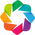

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [73]:
import holoviews as hv
hv.extension('bokeh')

eth_all_features_df.hvplot()